<a href="https://colab.research.google.com/github/agung15-debug/Brownicoa-Sales/blob/main/Sales%20Recommendation%20using%20RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kelompok 1
* Agung Prayogi 
* Annisa Dwi Ari
* Annisa Amalia Putri
* Azhura Chisha Maye
* Abadila Barasmara Bias Dewandra

#**Use Case Summary**
## Objective Statement
*   Get insight how much customer spend every day on every monts
*  Get insight who is the salesperson who sells the most brownies
*  Get insight about which variant is the best selling brownies
* Get insight about the ratio between customer segment
* Get insight about marketing strategy or planning based on segmentation
* Get insight about how big they spend on a transaction
* Get insight about trend on every month
* Get business insight about how, when and whom to promote business on the right time
* Get insight about marketing strategy or planning based on segmentation

## Challenges
* There is data that has an inappropriate data type
* Lots of blank data
* Data that is not evenly distributed

## Methodology / Analytic Technique
* Descriptive analysis
* Graph analysis
* RFM(Recency, Frequency, Monetary) Model

## Business Benefit
* Help Business to make decision about marketing strategy based on customer segmentation
* Know customer need and help business to focus on product what selling best

## Expected Outcome
*   Get to know how much customer spend every day on every monts
*  Get to know who is the salesperson who sells the most brownies
*  Get to know about which variant is the best selling brownies
* Get to know about the ratio between customer segment
* Get to know about marketing strategy or planning based on segmentation
* Get to know about how big they spend on a transaction
* Get to know about trend on every month
* Get to know about marketing strategy or planning based on segmentation
* Get to know when, how, and for whom the product will be promote
* Recommendation based on customer segmentation

# **Business Understanding**
This case has some business question using the data :
* How many customer spend every day on every year ?
* How big they are spend on every transaction ?
* How about Customer segmentation based on customer spend?
* How about recommendation based customer segmentation?

# **Data Understanding**

* Order data is a record of customer purchase data from April 20, 2021 to February 25, 2022
* Data source from Nichoa Chocolate Order Data
* The dataset has 46 column and 582 rows
* Data Dictionary : 
  * order no : The ID when customer Order
  * order data : Date when customer order

# Data Preparation
Code Used:
* Python Version: 3.7.15
* Packages: Pandas, Numpy, Matplotlib, Seaborn, Datetime


# Data Cleansing
There is column don't have any value on that. So, drop that column. There is 6 column that has an inappropriate data type so it is necessary to adjust the data type. There is 4 rows that has NaN value on every column so drop that rows. There is non-sense columns so drop that. There is NaN value on the table so fill it with meaningful data.

# Import Library

In [ ]:
# import all necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_object_dtype, is_numeric_dtype
from matplotlib.cbook import boxplot_stats

import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)  

# Data Profilling

In [ ]:
url='https://drive.google.com/file/d/1HqWlnEsch_OjOXxbuCTGKsHdAy6a0MHw/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

In [ ]:
# load data
# df = pd.read_csv("order_data.csv")
df = pd.read_csv(url)

In [ ]:
# check head
df.head()

,order no,order date,order time,order source,serve by,sales name,sales email,customer type,customer id,customer name,customer code,customer email,customer phone,brand,item group,item name,item sku,item uom,serial no,qty,currency,basic_price,price,add-on price,discount percent,discount amount,amount,tax_amount,cost perunit,total cost,profit,Provinsi,shipping to,shipping address,notes,paid,payment type,bank,Provinsi.1,bank account no,shipping courier,shipping service type,shipping tracking no,shipping date,order status,posting time
0,E39421042000000227,20/04/2021 00:00,20/04/2021 08:40,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7519772,Feri Fitriana,NaN,NaN,'081329173047,Brownichoa,Brownies,Brownichoa Almond,,g,,1,IDR,44000,44000,0,0,0,44000,0,31605,31605,12395,Jateng,Banyumas,"Jl gayemsari RT 7 RW 3 nomer 20B teluk, PWt se...",NaN,1,BNI Andri Setyowati,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Z,20/04/2021 08:40
1,E39421042000000227,20/04/2021 00:00,20/04/2021 08:40,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7519772,Feri Fitriana,NaN,NaN,'081329173047,NaN,Brownies,Brownichoa Cheese,,NaN,,1,IDR,44000,44000,0,0,0,44000,0,30405,30405,13595,Jateng,Banyumas,"Jl gayemsari RT 7 RW 3 nomer 20B teluk, PWt se...",NaN,1,BNI Andri Setyowati,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Z,20/04/2021 08:40
2,E39421042000000228,20/04/2021 00:00,20/04/2021 08:42,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7519785,Amelia Ayu Via Dewanti,NaN,NaN,'081237479375,Brownichoa,Brownies,Brownichoa Almond,,g,,1,IDR,44000,44000,0,0,0,44000,0,31605,31605,12395,Jatim,Pacitan,"Craken Kulon RT 3/ RW 2 Desa Sumberharjo, Kabu...",NaN,1,BNI Andri Setyowati,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Z,20/04/2021 08:42
3,E39421042000000229,20/04/2021 00:00,20/04/2021 08:43,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7519797,Bu Is,NaN,NaN,'085747573100,NaN,Brownies,Brownichoa Cheese,,NaN,,1,IDR,44000,44000,0,0,0,44000,0,30405,30405,13595,Jateng,Kab Mgl,"Mertoyudan, Magelang",NaN,1,CASH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Z,20/04/2021 08:43
4,E39421042000000230,20/04/2021 00:00,20/04/2021 08:43,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7519802,Diah Setiani,NaN,NaN,'0895364805487,Brownichoa,Brownies,Brownichoa Mixed Nut,,NaN,,1,IDR,48000,48000,0,0,0,48000,0,31805,31805,16195,Jateng,Kab Mgl,"Mertoyudan, Magelang",NaN,1,CASH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Z,20/04/2021 08:43


In [ ]:
df.shape

(581, 46)

In [ ]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order no               581 non-null    object 
 1   order date             581 non-null    object 
 2   order time             581 non-null    object 
 3   order source           581 non-null    object 
 4   serve by               573 non-null    object 
 5   sales name             581 non-null    object 
 6   sales email            581 non-null    object 
 7   customer type          581 non-null    object 
 8   customer id            581 non-null    int64  
 9   customer name          581 non-null    object 
 10  customer code          0 non-null      float64
 11  customer email         10 non-null     object 
 12  customer phone         553 non-null    object 
 13  brand                  467 non-null    object 
 14  item group             581 non-null    object 
 15  item n

> We can see that there are no features with missing values(null).

In [ ]:
# check null
df.isna().sum()

order no                   0
order date                 0
order time                 0
order source               0
serve by                   8
sales name                 0
sales email                0
customer type              0
customer id                0
customer name              0
customer code            581
customer email           571
customer phone            28
brand                    114
item group                 0
item name                  0
item sku                   0
item uom                 233
serial no                  0
qty                        0
currency                   0
basic_price                0
price                      0
add-on price               0
discount percent           0
discount amount            0
amount                     0
tax_amount                 0
cost perunit               0
total cost                 0
profit                     0
Provinsi                   0
shipping to                0
shipping address           1
notes         

In [ ]:
df.describe()

,customer id,customer code,qty,basic_price,price,add-on price,discount percent,discount amount,amount,tax_amount,cost perunit,total cost,profit,notes,paid,bank,Provinsi.1,bank account no,shipping courier
count,5.810000e+02,0.0,581.000000,581.000000,581.000000,581.0,581.000000,581.000000,581.00000,581.0,581.000000,581.000000,581.000000,0.0,581.0,0.0,0.0,0.0,4.0
mean,8.854570e+06,NaN,1.395869,44929.432014,44917.383821,0.0,0.072289,41.824441,62613.94148,0.0,30933.179002,43094.791738,19538.590361,NaN,1.0,NaN,NaN,NaN,1.5
std,1.436682e+06,NaN,1.606533,1636.916104,1641.337986,0.0,0.750820,488.194538,71428.38392,0.0,988.441838,49026.605894,22588.215751,NaN,0.0,NaN,NaN,NaN,1.0
min,6.285829e+06,NaN,1.000000,42000.000000,41800.000000,0.0,0.000000,0.000000,40000.00000,0.0,29306.000000,12694.000000,8395.000000,NaN,1.0,NaN,NaN,NaN,0.0
25%,7.799064e+06,NaN,1.000000,44000.000000,44000.000000,0.0,0.000000,0.000000,44000.00000,0.0,30405.000000,30705.000000,12395.000000,NaN,1.0,NaN,NaN,NaN,1.5
50%,8.434559e+06,NaN,1.000000,44000.000000,44000.000000,0.0,0.000000,0.000000,44000.00000,0.0,31605.000000,31605.000000,14694.000000,NaN,1.0,NaN,NaN,NaN,2.0
75%,1.024959e+07,NaN,1.000000,46000.000000,46000.000000,0.0,0.000000,0.000000,48000.00000,0.0,31605.000000,31805.000000,16195.000000,NaN,1.0,NaN,NaN,NaN,2.0
max,1.186503e+07,NaN,20.000000,48000.000000,48000.000000,0.0,10.000000,9600.000000,880000.00000,0.0,32600.000000,586120.000000,293880.000000,NaN,1.0,NaN,NaN,NaN,2.0


**From the data above**, it can be seen that **at least 1 customer buys brownies and at most 20 pieces.** Of all the products, we know that the **cheapest price is 42,000** and the m**ost expensive is 48,000** with an **average product selling price of 44,929**. **There have never been additional companions sold for brownies**. **the smallest discount is 0** and **the biggest discount is 10 percent.** **The smallest amount of discount given is 0** and **the largest is 9600** with an **average discount given is 41.82**. Tax has not been given because VAT has not been applied. From here we know that **the smallest cost incurred for brownie products is 29306** and **the largest cost is 32600** and **the average cost for each brownie is 3093**3. Of all the costs incurred from each sale, **the smallest cost in one transaction is 12694** and **the largest cost issued in one transaction is 586120** with an **average cost incurred in one transaction is 43094.79**. From **each sale** of brownies, **the smallest profit is 8395** and **the largest is 293880** with **the average profit from all sales being 19538.59**

# Data Cleansing

**Columns that have no value are dropped because they have no effect on the calculations for the model**

In [ ]:
column_name = list(df.columns)
for i in range(len(column_name)) :
  if df[column_name[i]].isna().sum() > 500 :
    df.drop(column_name[i], axis=1, inplace=True)

**Drop column which is useless and has no effect on the model**

In [ ]:
df.drop(['order time','brand', 'item group', 'item sku', 'item uom', 'serial no', 'currency', 'shipping address', 'paid', 'order status', 'posting time'], axis=1, inplace=True)

**Fixed columns Format**

In [ ]:
# fixed order date
df['order date'] = pd.to_datetime(df['order date'], format="%d/%m/%Y 00:00")
df['Year'] = df['order date'].dt.strftime('%Y')
df['Day'] = df['order date'].dt.strftime('%m-%d')
df['Month'] = df['order date'].dt.strftime('%m')

#customer id to string
df['customer id']= df['customer id'].astype(str).str.rstrip('.0')

# casting numeric column
num_name = ['discount percent','amount', 'tax_amount', 'profit']
for i in range(len(num_name)) :
  df[num_name[i]] = pd.to_numeric(df[num_name[i]], errors='coerce')
df.isna().sum()

order no             0
order date           0
order source         0
serve by             8
sales name           0
sales email          0
customer type        0
customer id          0
customer name        0
customer phone      28
item name            0
qty                  0
basic_price          0
price                0
add-on price         0
discount percent     0
discount amount      0
amount               0
tax_amount           0
cost perunit         0
total cost           0
profit               0
Provinsi             0
shipping to          0
payment type         0
Year                 0
Day                  0
Month                0
dtype: int64

In [ ]:
#fill customer phone with Unknown
df['customer phone'].fillna("Unknown", inplace=True)

#fill serve by on online transaction
df['serve by'].fillna("Online", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order no          581 non-null    object        
 1   order date        581 non-null    datetime64[ns]
 2   order source      581 non-null    object        
 3   serve by          581 non-null    object        
 4   sales name        581 non-null    object        
 5   sales email       581 non-null    object        
 6   customer type     581 non-null    object        
 7   customer id       581 non-null    object        
 8   customer name     581 non-null    object        
 9   customer phone    581 non-null    object        
 10  item name         581 non-null    object        
 11  qty               581 non-null    int64         
 12  basic_price       581 non-null    int64         
 13  price             581 non-null    int64         
 14  add-on price      581 non-

In [ ]:
df

,order no,order date,order source,serve by,sales name,sales email,customer type,customer id,customer name,customer phone,item name,qty,basic_price,price,add-on price,discount percent,discount amount,amount,tax_amount,cost perunit,total cost,profit,Provinsi,shipping to,payment type,Year,Day,Month
0,E39421042000000227,2021-04-20,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7519772,Feri Fitriana,'081329173047,Brownichoa Almond,1,44000,44000,0,0,0,44000,0,31605,31605,12395,Jateng,Banyumas,BNI Andri Setyowati,2021,04-20,04
1,E39421042000000227,2021-04-20,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7519772,Feri Fitriana,'081329173047,Brownichoa Cheese,1,44000,44000,0,0,0,44000,0,30405,30405,13595,Jateng,Banyumas,BNI Andri Setyowati,2021,04-20,04
2,E39421042000000228,2021-04-20,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7519785,Amelia Ayu Via Dewanti,'081237479375,Brownichoa Almond,1,44000,44000,0,0,0,44000,0,31605,31605,12395,Jatim,Pacitan,BNI Andri Setyowati,2021,04-20,04
3,E39421042000000229,2021-04-20,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7519797,Bu Is,'085747573100,Brownichoa Cheese,1,44000,44000,0,0,0,44000,0,30405,30405,13595,Jateng,Kab Mgl,CASH,2021,04-20,04
4,E39421042000000230,2021-04-20,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7519802,Diah Setiani,'0895364805487,Brownichoa Mixed Nut,1,48000,48000,0,0,0,48000,0,31805,31805,16195,Jateng,Kab Mgl,CASH,2021,04-20,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,E39422022200000577,2022-02-22,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,8072217,Lurianda Laras,'081904054663,Brownichoa Mixed Nut,1,48000,48000,0,0,0,48000,0,31805,31805,16195,Jateng,Kab Mgl,Tokopedia,2022,02-22,02
577,E39422022200000577,2022-02-22,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,8072217,Lurianda Laras,'081904054663,Brownichoa Peanut Butter,1,46000,46000,0,0,0,46000,0,31605,31605,14395,Jateng,Kab Mgl,Tokopedia,2022,02-22,02
578,E39422022200000579,2022-02-22,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,11865029,Wiwit Wulandari (By Ayu Adhelina),'081332402302,Brownichoa Almond,1,44000,44000,0,0,0,44000,0,31605,31605,12395,Jatim,Surabaya,Mandiri CV Nutrico Nusantara,2022,02-22,02
579,E39422022200000579,2022-02-22,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,11865029,Wiwit Wulandari (By Ayu Adhelina),'081332402302,Brownichoa Chocochips,1,44000,44000,0,0,0,44000,0,29306,29306,14694,Jatim,Surabaya,Mandiri CV Nutrico Nusantara,2022,02-22,02


In [ ]:
df.describe()

,qty,basic_price,price,add-on price,discount percent,discount amount,amount,tax_amount,cost perunit,total cost,profit
count,581.000000,581.000000,581.000000,581.0,581.000000,581.000000,581.00000,581.0,581.000000,581.000000,581.000000
mean,1.395869,44929.432014,44917.383821,0.0,0.072289,41.824441,62613.94148,0.0,30933.179002,43094.791738,19538.590361
std,1.606533,1636.916104,1641.337986,0.0,0.750820,488.194538,71428.38392,0.0,988.441838,49026.605894,22588.215751
min,1.000000,42000.000000,41800.000000,0.0,0.000000,0.000000,40000.00000,0.0,29306.000000,12694.000000,8395.000000
25%,1.000000,44000.000000,44000.000000,0.0,0.000000,0.000000,44000.00000,0.0,30405.000000,30705.000000,12395.000000
50%,1.000000,44000.000000,44000.000000,0.0,0.000000,0.000000,44000.00000,0.0,31605.000000,31605.000000,14694.000000
75%,1.000000,46000.000000,46000.000000,0.0,0.000000,0.000000,48000.00000,0.0,31605.000000,31805.000000,16195.000000
max,20.000000,48000.000000,48000.000000,0.0,10.000000,9600.000000,880000.00000,0.0,32600.000000,586120.000000,293880.000000


# EDA

In [ ]:
print(df["order date"].min())
print(df["order date"].max())

2021-04-20 00:00:00
2022-02-25 00:00:00


The data is from 1 year transaction. order data is a record of customer purchase data in 1 years transcation from April 20, 2021 to February 25, 2022



## Item Name

In [ ]:
def getPercent(df, x):
  total = (df[x].count().item())
  for i in list(df[x].unique()):
    a = 0
    b = df[df[x] == i].count()[x].astype(np.float32).item()
    a = (b)/total * 100
    print(f"{i}: {b}, Percentage of '{i}' is {a:.2f}% from all customers")

In [ ]:
def hPlotShowAnn(bar, df, x):
  for rect in bar.patches:
        width = rect.get_width()
        total = (df[x].count().item())
        plt.text(rect.get_width() + 20, rect.get_y()+0.5*rect.get_height(),
                 str('%.2f' % float(width/total * 100)) + '%',
                 ha='center', va='center')

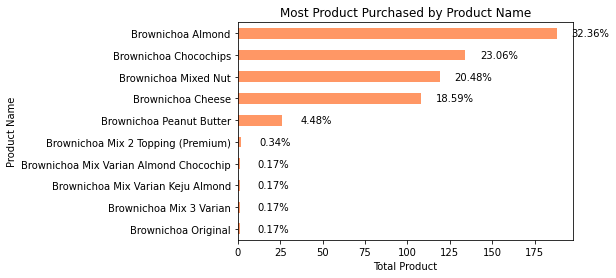

In [ ]:
ax = df['item name'].value_counts().plot(kind='barh', color='#FF9765', zorder=2)
ax.set_title("Most Product Purchased by Product Name", y = 1)
ax.set_xlabel('Total Product')
ax.set_ylabel('Product Name')
ax.invert_yaxis()

hPlotShowAnn(ax, df, 'item name')
plt.show()

In [ ]:
getPercent(df, 'item name')

Brownichoa Almond: 188.0, Percentage of 'Brownichoa Almond' is 32.36% from all customers
Brownichoa Cheese: 108.0, Percentage of 'Brownichoa Cheese' is 18.59% from all customers
Brownichoa Mixed Nut: 119.0, Percentage of 'Brownichoa Mixed Nut' is 20.48% from all customers
Brownichoa Chocochips: 134.0, Percentage of 'Brownichoa Chocochips' is 23.06% from all customers
Brownichoa Peanut Butter: 26.0, Percentage of 'Brownichoa Peanut Butter' is 4.48% from all customers
Brownichoa Mix Varian Almond Chocochip: 1.0, Percentage of 'Brownichoa Mix Varian Almond Chocochip' is 0.17% from all customers
Brownichoa Mix Varian Keju Almond: 1.0, Percentage of 'Brownichoa Mix Varian Keju Almond' is 0.17% from all customers
Brownichoa Mix 3 Varian: 1.0, Percentage of 'Brownichoa Mix 3 Varian' is 0.17% from all customers
Brownichoa Original: 1.0, Percentage of 'Brownichoa Original' is 0.17% from all customers
Brownichoa Mix 2 Topping (Premium): 2.0, Percentage of 'Brownichoa Mix 2 Topping (Premium)' is 

>In the graph above, Brownichoa Almonds are the most frequently purchased item by customers, namely a total purchase of 188 pieces with a percentage of 32.36% of the entire customer, followed by Brownichoa Chocochips, a total purchase of 134 pieces with 23.06% of the entire customer. 

>Brownie variants that customers rarely purchase are the Brownichoa Mix Almond Chocochip Variant, Mix Almond Cheese Variant, Mix 3 Variant and Original, with a total purchase of each only once.

## Sales Name

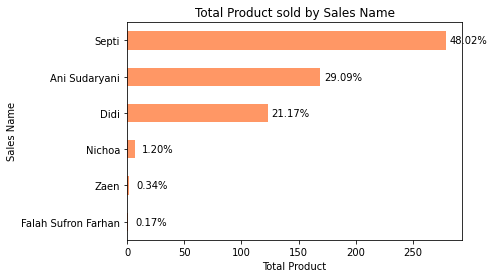

In [ ]:
ax = df['sales name'].value_counts().plot(kind='barh', color='#FF9765')
ax.set_title("Total Product sold by Sales Name", y = 1)
ax.set_xlabel('Total Product')
ax.set_ylabel('Sales Name')
ax.invert_yaxis()

hPlotShowAnn(ax, df, 'sales name')
plt.show()

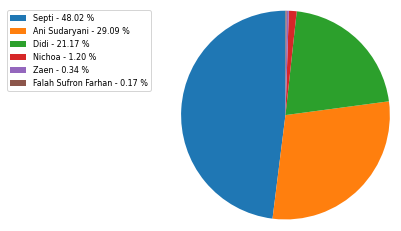

In [ ]:
x = list(df['sales name'].value_counts().index)
y = list(df['sales name'].value_counts())
total = (df['sales name'].count().item())
porcent = [round(i/total * 100, 2) for i in y]

patches, texts = plt.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

In [ ]:
getPercent(df, 'sales name')

Ani Sudaryani: 169.0, Percentage of 'Ani Sudaryani' is 29.09% from all customers
Falah Sufron Farhan: 1.0, Percentage of 'Falah Sufron Farhan' is 0.17% from all customers
Nichoa: 7.0, Percentage of 'Nichoa' is 1.20% from all customers
Didi: 123.0, Percentage of 'Didi' is 21.17% from all customers
Zaen: 2.0, Percentage of 'Zaen' is 0.34% from all customers
Septi: 279.0, Percentage of 'Septi' is 48.02% from all customers


>From the graph above, we can see that the **biggest salesperson who sold brownies** of all variants was **Septi with a total of 48.02%** of all transactions that occurred. Then, followed second by **Ani Sudaryani** with **a total of 29.09%**of all transactions that occurred.

In [ ]:
df[['sales name', 'Year', 'Month','customer id']].groupby(['sales name', 'Year', 'Month']).agg({'customer id': 'count'})

customer id
sales name          Year Month             
Ani Sudaryani       2021 04              28
                         05              89
                         06               5
                         09              13
                    2022 01               5
                         02              29
Didi                2021 06              47
                         07              23
                         08              48
                         09               5
Falah Sufron Farhan 2021 05               1
Nichoa              2021 05               3
                         11               4
Septi               2021 09              11
                         10              37
                         11              88
                         12             112
                    2022 01              31
Zaen                2021 09               2

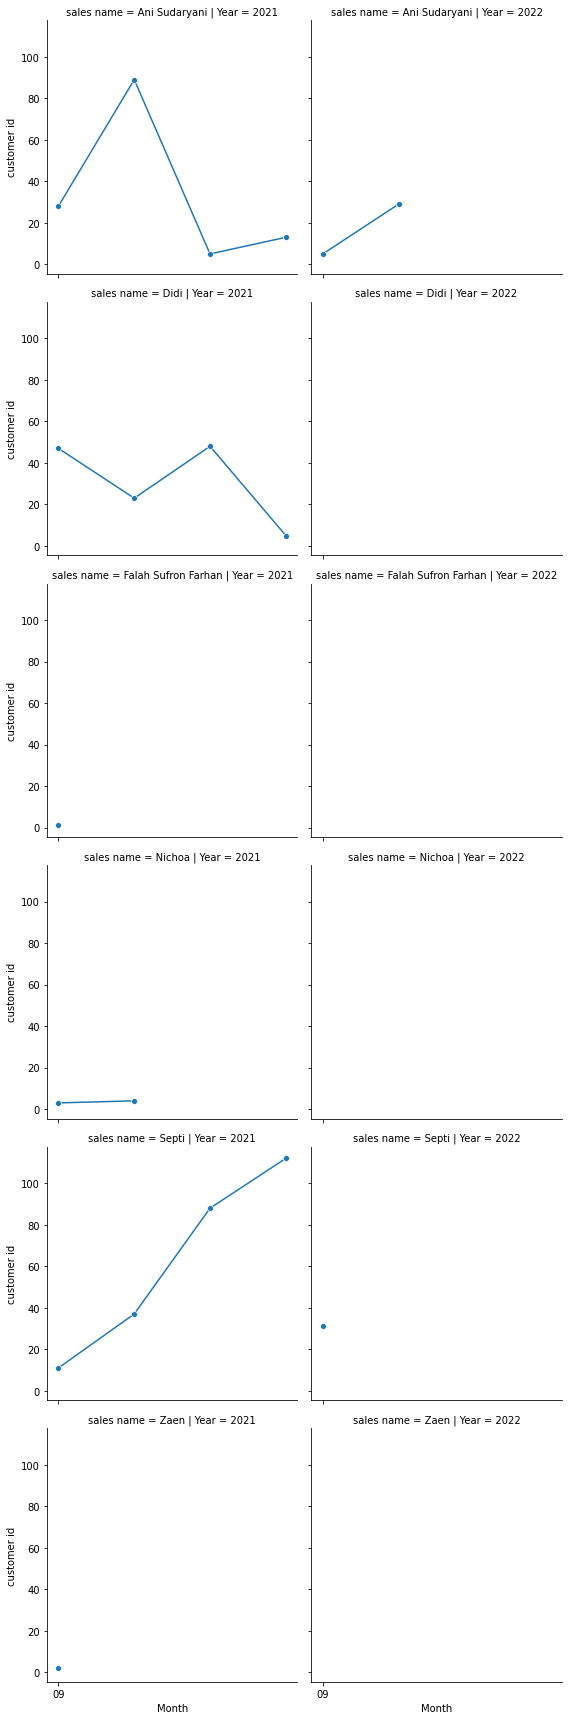

In [ ]:
tes = df[['sales name', 'Year', 'Month','customer id']].groupby(['sales name', 'Year', 'Month'], as_index=False).agg({'customer id': 'count'})
sns.relplot(x='Month', y='customer id', col='Year', row='sales name', height=4, kind='line', estimator=None, data=tes, marker="o")

## Province

In [ ]:
df['Provinsi'].value_counts()

Jateng       367
DIY           52
Jabar         50
DKI JKT       37
Tangerang     36
Jatim         25
Banten         4
Bali           2
Sumsel         2
Sumut          2
NTB            2
0              1
Karawang       1
Name: Provinsi, dtype: int64

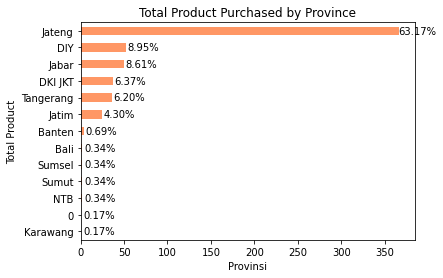

In [ ]:
ax = df['Provinsi'].value_counts().plot(kind='barh', color='#FF9765')
ax.set_title("Total Product Purchased by Province", y = 1)
ax.set_xlabel('Provinsi')
ax.set_ylabel('Total Product')
ax.invert_yaxis()

hPlotShowAnn(ax, df, 'Provinsi')
plt.show()

In [ ]:
getPercent(df, 'Provinsi')

Jateng: 367.0, Percentage of 'Jateng' is 63.17% from all customers
Jatim: 25.0, Percentage of 'Jatim' is 4.30% from all customers
Jabar: 50.0, Percentage of 'Jabar' is 8.61% from all customers
DKI JKT: 37.0, Percentage of 'DKI JKT' is 6.37% from all customers
DIY: 52.0, Percentage of 'DIY' is 8.95% from all customers
Tangerang: 36.0, Percentage of 'Tangerang' is 6.20% from all customers
Banten: 4.0, Percentage of 'Banten' is 0.69% from all customers
Bali: 2.0, Percentage of 'Bali' is 0.34% from all customers
Sumsel: 2.0, Percentage of 'Sumsel' is 0.34% from all customers
Sumut: 2.0, Percentage of 'Sumut' is 0.34% from all customers
NTB: 2.0, Percentage of 'NTB' is 0.34% from all customers
0: 1.0, Percentage of '0' is 0.17% from all customers
Karawang: 1.0, Percentage of 'Karawang' is 0.17% from all customers


>Based on the graph above, we know that **the highest total customers** are in the **Central Java region**, with 63.17% of the entire customers with a total of 367 customers.This is caused by the offline store being in the Central Java area. While the **lowest total customers** are in the **Karawang region**, with  1% of the total customers with one total customer. 

## Customer Type

In [ ]:
df['customer type'].value_counts()

Guest                   410
shopee                   66
Bukalapak                58
Tokopedia                18
karyawan Diskon 10 %     16
Reseller                  6
konsinyasi                3
gofood                    2
grab                      2
Name: customer type, dtype: int64

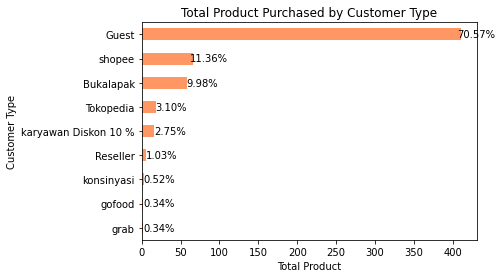

In [ ]:
ax = df['customer type'].value_counts().plot(kind='barh', color='#FF9765')
ax.set_title("Total Product Purchased by Customer Type", y = 1)
ax.set_xlabel('Total Product')
ax.set_ylabel('Customer Type')
ax.invert_yaxis()

hPlotShowAnn(ax, df, 'customer type')
plt.show()

In [ ]:
getPercent(df, 'customer type')

Guest: 410.0, Percentage of 'Guest' is 70.57% from all customers
shopee: 66.0, Percentage of 'shopee' is 11.36% from all customers
karyawan Diskon 10 %: 16.0, Percentage of 'karyawan Diskon 10 %' is 2.75% from all customers
Tokopedia: 18.0, Percentage of 'Tokopedia' is 3.10% from all customers
Reseller: 6.0, Percentage of 'Reseller' is 1.03% from all customers
konsinyasi: 3.0, Percentage of 'konsinyasi' is 0.52% from all customers
Bukalapak: 58.0, Percentage of 'Bukalapak' is 9.98% from all customers
gofood: 2.0, Percentage of 'gofood' is 0.34% from all customers
grab: 2.0, Percentage of 'grab' is 0.34% from all customers


>Based on the graph above, the customer often buys through Nicoa's official website, **with 410 customers or 70.57%** of the total customer. While the platforms that customers rarely use are online motorcycle taxis, namely **grab and Gofood**, namely a total of only two customers with a percentage of **0.34% of the total customer.**

## Total Count Sale by month

In [ ]:
# agregrat order by day

df_agg = df.groupby(['Year','Month', 'Day']).amount.sum()
df_agg.head()

Year  Month  Day  
2021  04     04-20     224000
             04-23     140000
             04-26      92000
             04-27    2200000
             04-28      92000
Name: amount, dtype: int64

In [ ]:
df_agg = pd.DataFrame(df_agg)
df_agg = df_agg.reset_index()
df_agg.head()

,Year,Month,Day,amount
0,2021,04,04-20,224000
1,2021,04,04-23,140000
2,2021,04,04-26,92000
3,2021,04,04-27,2200000
4,2021,04,04-28,92000


In [ ]:
df_val = df_agg.groupby(['Year', 'Month']).count().Day
df_val

Year  Month
2021  04        7
      05        9
      06       14
      07        6
      08        7
      09       11
      10        9
      11       15
      12       15
2022  01       10
      02        8
Name: Day, dtype: int64

In [ ]:
df_val_amount = df_agg.groupby(['Year', 'Month']).sum().amount
df_val_amount

Year  Month
2021  04       3734000
      05       5890000
      06       2850000
      07       1110000
      08       2218000
      09       1520000
      10       1908000
      11       5635700
      12       6568000
2022  01       3243000
      02       1702000
Name: amount, dtype: int64

Text(0, 0.5, 'Count Sale')

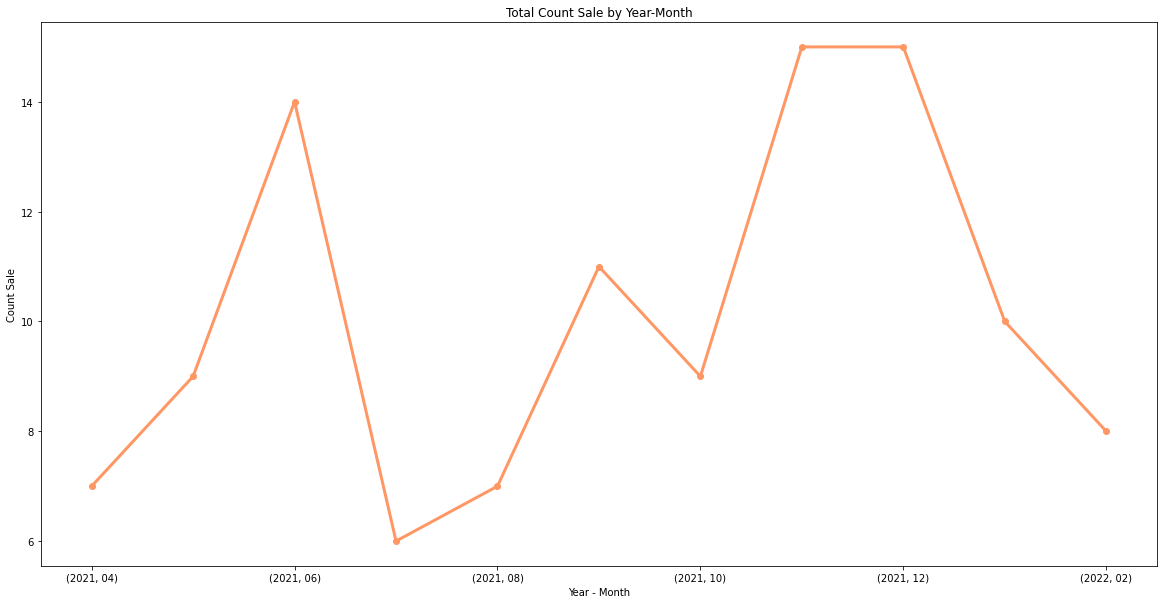

In [ ]:
fig = df_val.plot(kind='line', marker='o', linewidth=3, color='#FF9765', figsize=(20, 10))
fig.set_title("Total Count Sale by Year-Month", y = 1)
fig.set_xlabel('Year - Month')
fig.set_ylabel('Count Sale')

>From the graph above, we can see that the highest sales occurred in the 11th and 12th months. This increase in sales was due to several reasons, such as Christmas and Christmas preparations and patterns of public transactions that have year-end bonus money. In the 6th month, sales increased but as high as in the 11th and 12th months due to several reasons such as employee bonuses and holiday gifts.

## Sales Trend

Text(0, 0.5, 'Sum Sale')

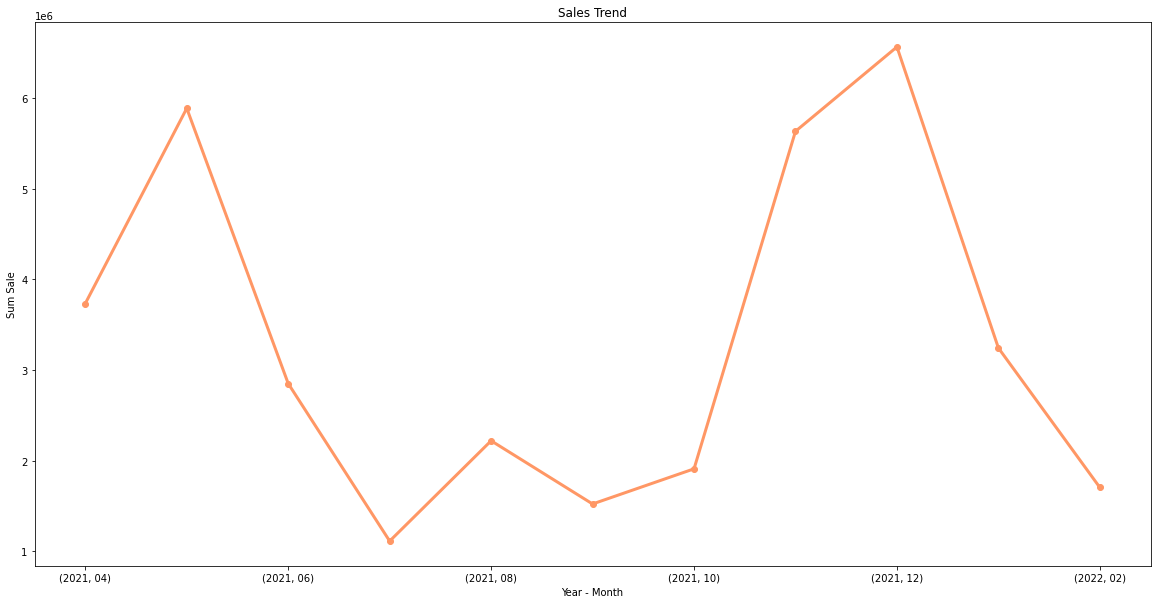

In [ ]:
fig = df_val_amount.plot(kind='line', marker='o', linewidth=3, color='#FF9765', figsize=(20, 10))
fig.set_title("Sales Trend", y = 1)
fig.set_xlabel('Year - Month')
fig.set_ylabel('Sum Sale')

In [ ]:
df_val_amount = pd.DataFrame(df_val_amount)
df_val_amount['amount'].sum()

36378700

>From the graph above, it can be seen that the sales trend tends to decrease from last year, but the amount of customer purchases increases to 6,568,000 in the twelfth month and the total of all customer purchases reaches 36,378,700

In [ ]:
def plot_df(df, x, y, title="",xlabel="Date", ylabel="Quantity", dpi = 100):
  plt.figure(figsize=(16,5), dpi=dpi)
  plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
  plt.plot(x,y, color='#404258', marker = 'o')
  plt.show()

In [ ]:
df[(df['Month'] == '04') & (df['Year'] == '2021')].groupby(['Day']).agg({'amount': 'sum'})

,amount
Day,
04-20,224000
04-23,140000
04-26,92000
04-27,2200000
04-28,92000
04-29,44000
04-30,942000


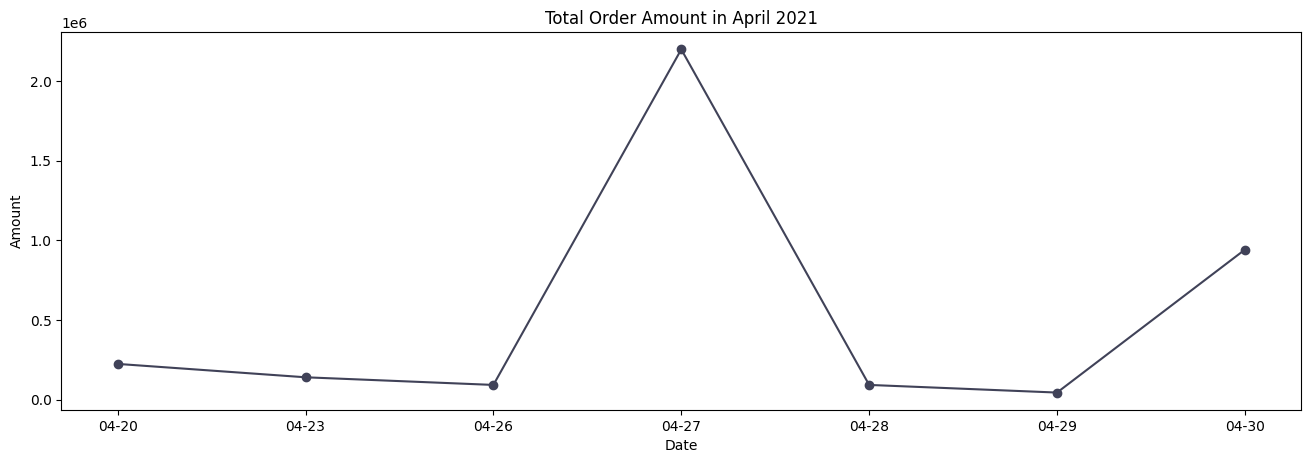

In [ ]:
plot_df(df_agg.query("(Month == '04' & Year=='2021')"), x = df_agg.query("(Month == '04' & Year=='2021')").Day, y=df_agg.query("(Month == '04' & Year=='2021')").amount, title ='Total Order Amount in April 2021', ylabel="Amount")

In [ ]:
p_increase = ((df_agg[df_agg['Day']=='04-30'].amount.iloc[0]-df_agg[df_agg['Day']=='04-20'].amount.iloc[0])/df_agg[df_agg['Day']=='04-20'].amount.iloc[0])*100
print('The percentage increase on customer spend by Monthly : %.2f'%p_increase)

The percentage increase on customer spend by Monthly : 320.54


>Based on the chart above, it can be seen that in April 2021 the trend of total **customer purchases increased** which **increase 320.54% by monthly**, even though in April 2021 there was a significant decrease on April 29 2021 which **reached a low point of 44,000** that just one transaction on that day, and **reached an all-time peak/high on April 27, 2021** which **reached 2,200,000**. From the chart we also know that the sudden increase in the sale of brownies in month 04 from 92,000 on 26 October and then reached its highest sales on 27 October 2,200,000, this was caused by several possibilities such as the results of online advertising, direct purchase offers in stores or the ability of the previous day's sales that convince customers to buy on that day, or also other factors such as month-end payday

In [ ]:
df[(df['Month'] == '05') & (df['Year'] == '2021')].groupby(['Day']).agg({'amount': 'sum'})

,amount
Day,
05-01,48000
05-04,892000
05-07,528000
05-09,44000
05-10,268000
05-11,2722000
05-21,896000
05-22,44000
05-31,448000


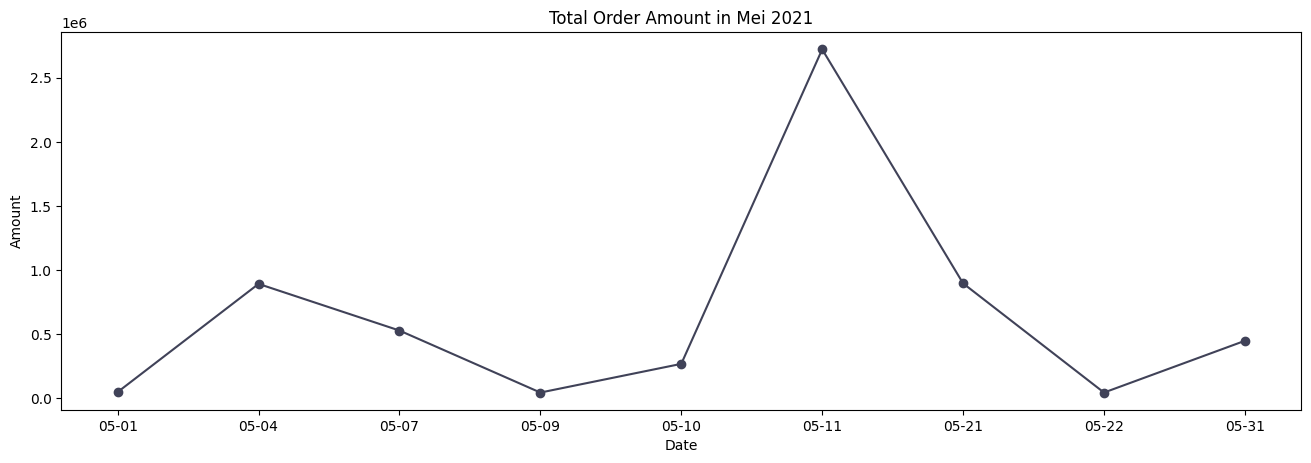

In [ ]:
plot_df(df_agg.query("(Month == '05' & Year=='2021')"), x = df_agg.query("(Month == '05' & Year=='2021')").Day, y=df_agg.query("(Month == '05' & Year=='2021')").amount, title ='Total Order Amount in Mei 2021', ylabel="Amount")

In [ ]:
p_increase = ((df_agg[df_agg['Day']=='05-31'].amount.iloc[0]-df_agg[df_agg['Day']=='05-01'].amount.iloc[0])/df_agg[df_agg['Day']=='05-01'].amount.iloc[0])*100
print('The percentage increase on customer spend by Monthly : %.2f'%p_increase)

The percentage increase on customer spend by Monthly : 833.33


Based on the chart above, it can be seen that in May 2021 the trend of total customer purchases increases which **increased 833.33% by Monthly**, although in May 2021 there was a significant decrease on May 09 2021 and **May 22, 2021 which reached a lowest point of 44000**, and reached an all-time peak/high on **May 11, 2021 which reached 2,722,000**. From the graph we also know that the amount of public consumption has increased this month, there are several things that influence it such as the Eid celebration. The sudden rise on May 11 2021 may be due to the celebration of my day so that people want to give gifts or souvenirs to their relatives

In [ ]:
df[(df['Month'] == '06') & (df['Year'] == '2021')].groupby(['Day']).agg({'amount': 'sum'})

,amount
Day,
06-01,324000
06-04,132000
06-05,272000
06-08,224000
06-09,408000
06-11,88000
06-14,176000
06-21,630000
06-22,140000


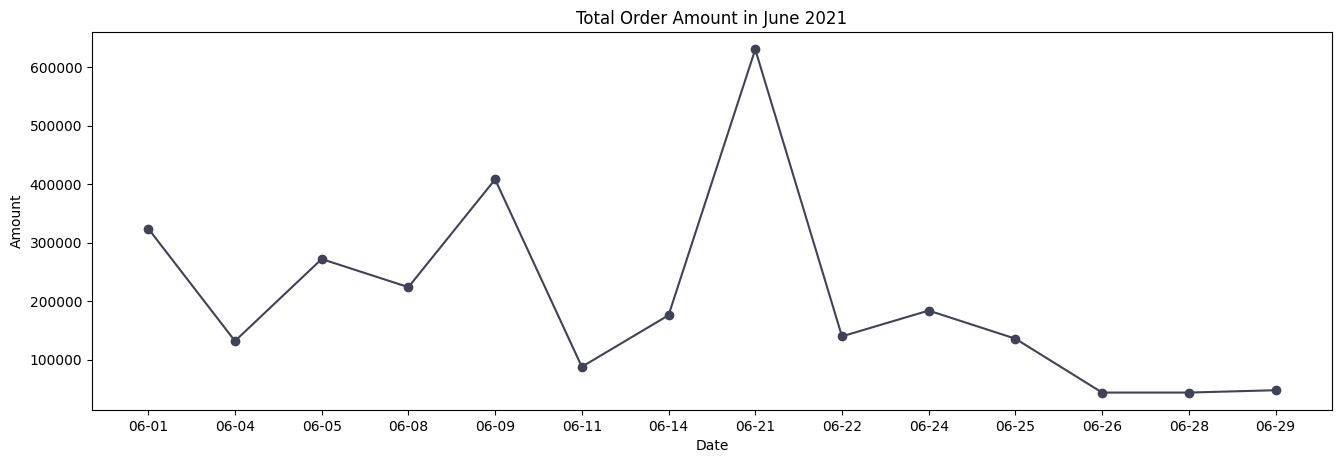

In [ ]:
plot_df(df_agg.query("(Month == '06' & Year=='2021')"), x = df_agg.query("(Month == '06' & Year=='2021')").Day, y=df_agg.query("(Month == '06' & Year=='2021')").amount, title ='Total Order Amount in June 2021', ylabel="Amount")

In [ ]:
p_increase = ((df_agg[df_agg['Day']=='06-29'].amount.iloc[0]-df_agg[df_agg['Day']=='06-01'].amount.iloc[0])/df_agg[df_agg['Day']=='06-01'].amount.iloc[0])*100
print('The percentage decrease on customer spend by Monthly : %.2f'%p_increase)

The percentage decrease on customer spend by Monthly : -85.19


Based on the chart above, it can be seen that in June 2021 the trend of total customer purchases decrease which **decreased 85.19% by monthly**, although in June 2021 there was a significant decrease on **June 26, 2021 and June 28, 2021 which reached a low point of 44000**, and reached an a**ll-time peak/high on June 21, 2021 which reached 630000**. From the graph we can also see that the amount of public consumption has increased this month, continuing the trend that occurred in the previous month, but the amount purchased each month has decreased. In this month also transactions occur almost every week evenly.

In [ ]:
df[(df['Month'] == '07') & (df['Year'] == '2021')].groupby(['Day']).agg({'amount': 'sum'})

,amount
Day,
07-02,132000
07-08,88000
07-10,88000
07-12,398000
07-16,220000
07-19,184000


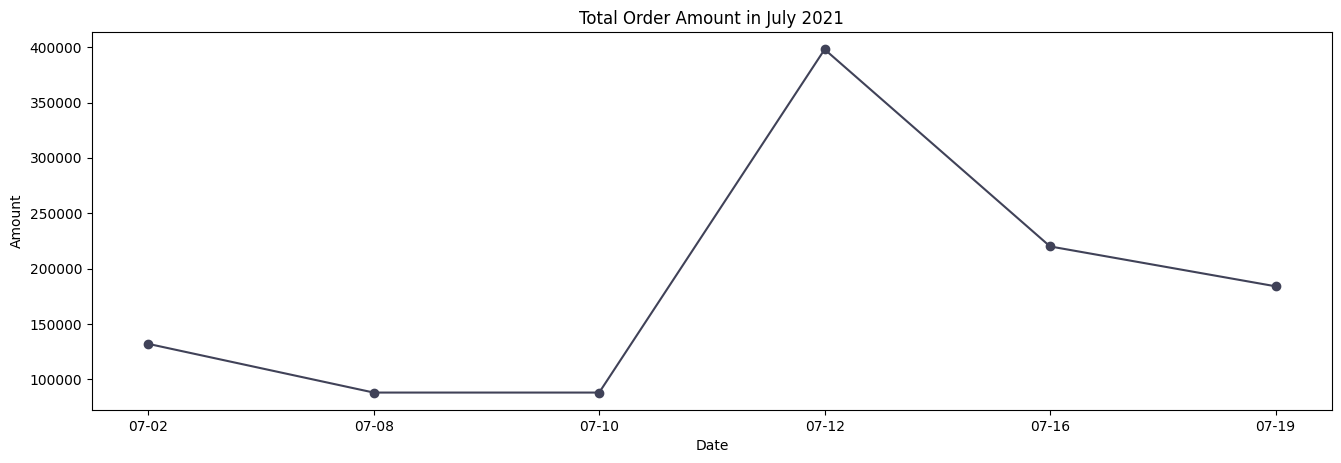

In [ ]:
plot_df(df_agg.query("(Month == '07' & Year=='2021')"), x = df_agg.query("(Month == '07' & Year=='2021')").Day, y=df_agg.query("(Month == '07' & Year=='2021')").amount, title ='Total Order Amount in July 2021', ylabel="Amount")

In [ ]:
p_increase = ((df_agg[df_agg['Day']=='07-19'].amount.iloc[0]-df_agg[df_agg['Day']=='07-02'].amount.iloc[0])/df_agg[df_agg['Day']=='07-02'].amount.iloc[0])*100
print('The percentage increase on customer spend by Monthly : %.2f'%p_increase)

The percentage increase on customer spend by Monthly : 39.39


>Based on the graph above, it can be seen that in July 2021 the trend of total customer purchases increased which **increased 39.39% by montly**, although in July 2021 there was a **significant decrease on 08 July** 2021 which r**eached a low of 88000**, and reached an all-time peak/high on **July 12, 2021** which **reached 398000**. From the chart we can also see that there were **only 6 transaction days** that occurred where in the **first week there was only one** sale, in the **second week there were 2 sales**, in the **third week there were 3 sales**, and there were **no sales in the fourth week**. The amount of customer consumption decreased resulting in the amount of sales also decreased

In [ ]:
df[(df['Month'] == '08') & (df['Year'] == '2021')].groupby(['Day']).agg({'amount': 'sum'})

,amount
Day,
08-02,492000
08-05,48000
08-10,704000
08-12,618000
08-14,88000
08-21,224000
08-24,44000


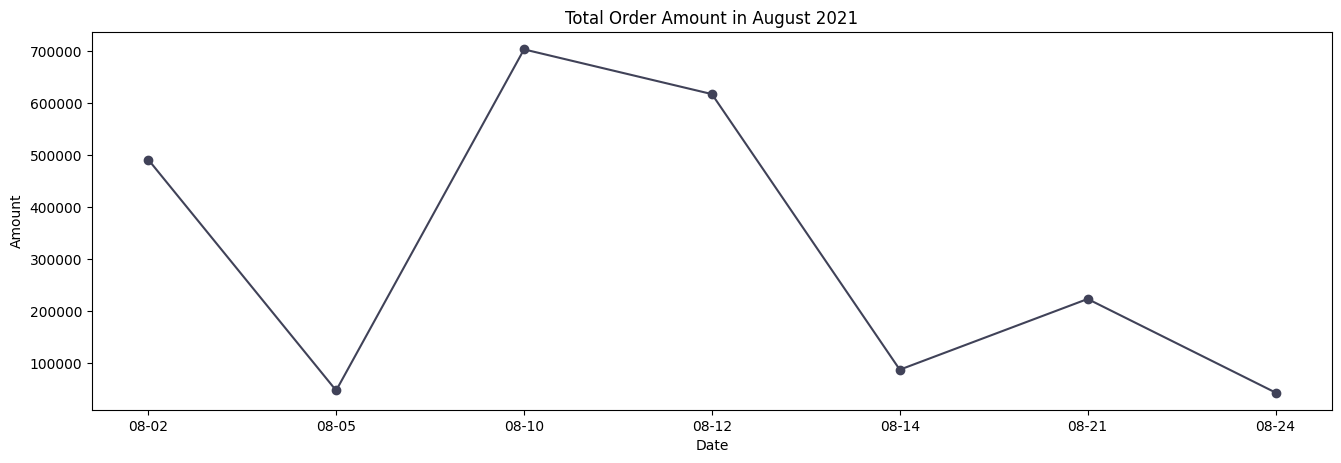

In [ ]:
plot_df(df_agg.query("(Month == '08' & Year=='2021')"), x = df_agg.query("(Month == '08' & Year=='2021')").Day, y=df_agg.query("(Month == '08' & Year=='2021')").amount, title ='Total Order Amount in August 2021', ylabel="Amount")

In [ ]:
p_increase = ((df_agg[df_agg['Day']=='08-24'].amount.iloc[0]-df_agg[df_agg['Day']=='08-02'].amount.iloc[0])/df_agg[df_agg['Day']=='08-02'].amount.iloc[0])*100
print('The Decrease increase on customer spend by Monthly : %.2f'%p_increase)

The Decrease increase on customer spend by Monthly : -91.06


Based on the chart above, it can be seen that in August 2021 the trend of total customer purchases Decrease which **decreased 91.06% by monthly but increased by total amount** which customer spent, although in August 2021 there was a **significant decrease on August 05 2021** which reached a low point of **44000**, and reached an **all-time peak/high** on **August 10, 2021** which **reached 704000**. From the chart, we also know that sales this month also don't occur every day, but only a few days each week. In **the first week** there were **only 2 transaction days**, in **the second week** there were **only 3 transaction days**, in **the third week** there was **only 1 transaction day** and in **the fourth week** there was **only 1 transaction day** as well. Compared to the previous month, the increase that occurred was also not significant

In [ ]:
df[(df['Month'] == '09') & (df['Year'] == '2021')].groupby(['Day']).agg({'amount': 'sum'})

,amount
Day,
09-03,220000
09-14,264000
09-16,140000
09-17,44000
09-18,136000
09-20,88000
09-21,44000
09-27,140000
09-28,88000


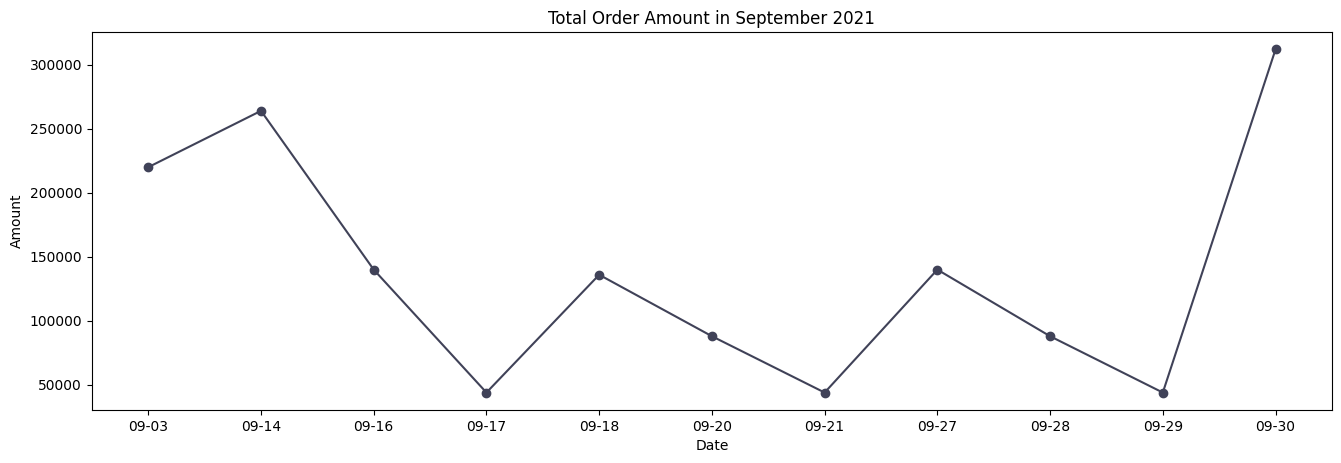

In [ ]:
plot_df(df_agg.query("(Month == '09' & Year=='2021')"), x = df_agg.query("(Month == '09' & Year=='2021')").Day, y=df_agg.query("(Month == '09' & Year=='2021')").amount, title ='Total Order Amount in September 2021', ylabel="Amount")

In [ ]:
p_increase = ((df_agg[df_agg['Day']=='09-30'].amount.iloc[0]-df_agg[df_agg['Day']=='09-03'].amount.iloc[0])/df_agg[df_agg['Day']=='09-03'].amount.iloc[0])*100
print('The increase on customer spend by Monthly : %.2f'%p_increase)

The increase on customer spend by Monthly : 41.82


Based on the chart above, it can be seen that in September 2021 the trend of total customer purchases decreased which **increased 41.82% by monthly**, although in October 2021 there was a **significant decrease on September 17 and September 29, 2021** which reached a low point of **44000**, and reached **an all-time peak/high** on **September 30, 2021** which reached **312000**. 
From the chart we also know that transaction days are increasing and more evenly distributed each week where **in the first week** there are **only one transaction days**, in **the second week** there are **only one transaction days**, in **the third week** there are **5 transaction days**, and **in the fourth week** there are **4 transaction days**. As a result of this, the amount of public spending to buy our products has also increased

In [ ]:
df[(df['Month'] == '10') & (df['Year'] == '2021')].groupby(['Day']).agg({'amount': 'sum'})

,amount
Day,
10-04,364000
10-05,44000
10-13,132000
10-14,180000
10-16,228000
10-18,136000
10-21,456000
10-27,96000
10-28,272000


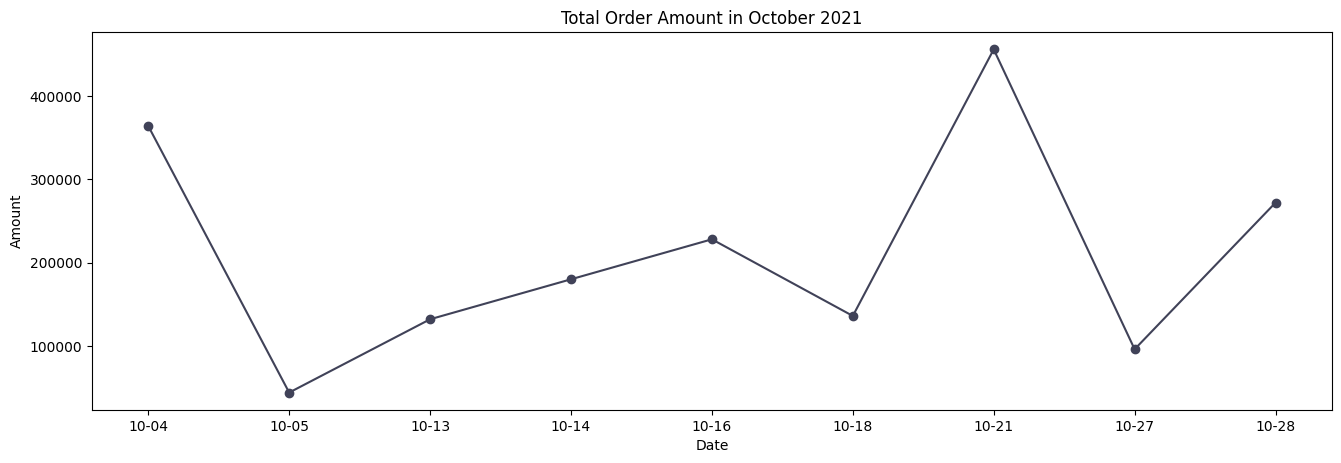

In [ ]:
plot_df(df_agg.query("(Month == '10' & Year=='2021')"), x = df_agg.query("(Month == '10' & Year=='2021')").Day, y=df_agg.query("(Month == '10' & Year=='2021')").amount, title ='Total Order Amount in October 2021', ylabel="Amount")

In [ ]:
p_increase = ((df_agg[df_agg['Day']=='10-28'].amount.iloc[0]-df_agg[df_agg['Day']=='10-04'].amount.iloc[0])/df_agg[df_agg['Day']=='10-04'].amount.iloc[0])*100
print('The Decrease on customer spend by Monthly : %.2f'%p_increase)

The Decrease on customer spend by Monthly : -25.27


Based on the chart above, it can be seen that in October 2021 the trend of total customer purchases decreased which **decreased 25.27% by monthly**, although in October 2021 there was a **significant decrease on October 05, 2021** which reached a low point of **44000**, and reached **an all-time peak/high** on **October 21, 2021** which reached **456000**. 
From the chart we also know that transaction days are increasing and more evenly distributed each week where **in the first week** there are **2 transaction days**, in **the second week** there are **2 transaction days**, in **the third week** there are **3 transaction days**, and **in the fourth week** there are **2 transaction days**. As a result of this, the amount of public spending to buy our products has also increased


In [ ]:
df[(df['Month'] == '11') & (df['Year'] == '2021')].groupby(['Day']).agg({'amount': 'sum'})

,amount
Day,
11-01,312000
11-05,44000
11-06,178000
11-08,92000
11-09,364000
11-11,130400
11-12,44000
11-15,264000
11-20,1918000


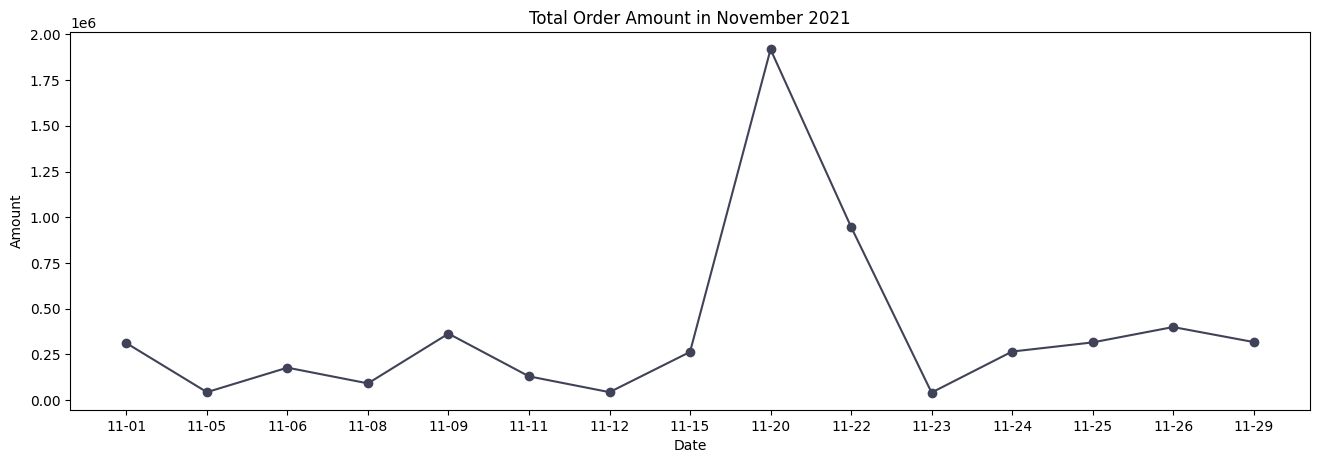

In [ ]:
plot_df(df_agg.query("(Month == '11' & Year=='2021')"), x = df_agg.query("(Month == '11' & Year=='2021')").Day, y=df_agg.query("(Month == '11' & Year=='2021')").amount, title ='Total Order Amount in November 2021', ylabel="Amount")

In [ ]:
p_increase = ((df_agg[df_agg['Day']=='11-29'].amount.iloc[0]-df_agg[df_agg['Day']=='11-01'].amount.iloc[0])/df_agg[df_agg['Day']=='11-01'].amount.iloc[0])*100
print('The Increase on customer spend by Monthly : %.2f'%p_increase)

The Increase on customer spend by Monthly : 1.92


Based on the chart above, it can be seen that in November 2021 the trend of total customer purchases experienced a fairly stable increase which **increased 1.92% by montly**, but on November 20, **sales increased dramatically from 264,000 from November 15 to 1,918,000 on November 20**, which was the highest peak of total sales in the month November 2021, then **decreased to reach its lowest point on November 23 of 41,800**. From the chart we also know that sales transactions have increased, we can see that from the large number of transaction days and the amount in one transaction. This month there were **3 transaction days** in **the first week**, **4 transaction days** in **the second week**, **3 transaction days** in **the third week** and **5 transaction days** in **the last week** and if you look at the amount of purchases that occur each day, of course the sales curve has also increased

In [ ]:
df[(df['Month'] == '12') & (df['Year'] == '2021')].groupby(['Day']).agg({'amount': 'sum'})

,amount
Day,
12-01,502000
12-07,1450000
12-10,88000
12-11,176000
12-14,220000
12-17,1100000
12-18,928000
12-20,572000
12-23,450000


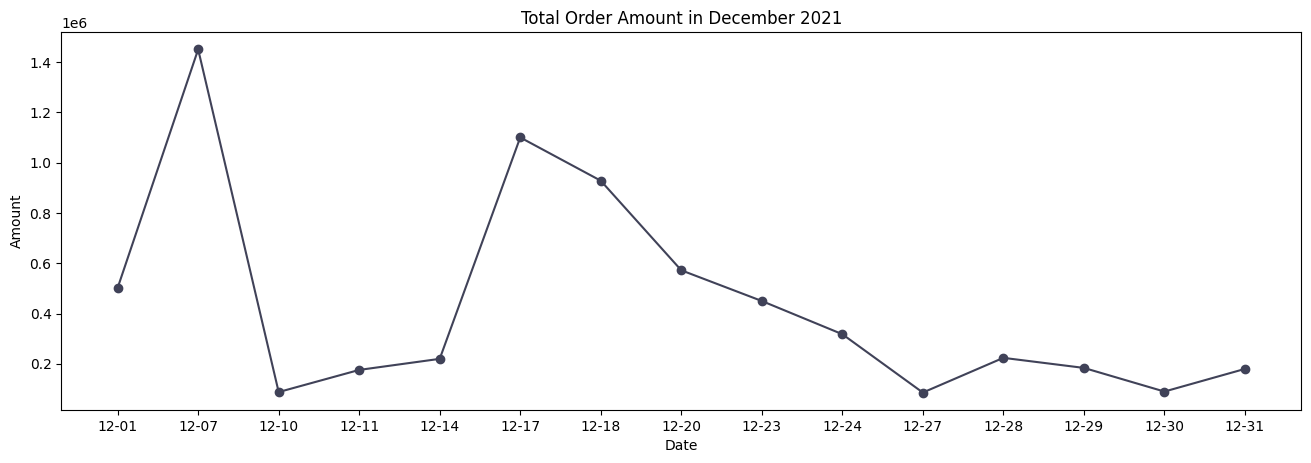

In [ ]:
plot_df(df_agg.query("(Month == '12' & Year=='2021')"), x = df_agg.query("(Month == '12' & Year=='2021')").Day, y=df_agg.query("(Month == '12' & Year=='2021')").amount, title ='Total Order Amount in December 2021', ylabel="Amount")

>Based on the graph above, it can be seen that in December 2021 the trend of total customer purchases has increased a lot at the beginning and middle of the month, this can be assumed because that date is approaching the Christmas celebration. The highest purchases were on December 7, reaching 1450000, then December 17-20 total purchases were above 500000. rom the chart we also know that sales transactions have increased, we can see that from the large number of transaction days and the amount in one transaction. This month there were **2 transaction days** in **the first week**, **3 transaction days** in **the second week**, **3 transaction days** in **the third week** and **7 transaction days** in **the last week** and if you look at the amount of purchases that occur each day, of course the sales curve has also increased

In [ ]:
df[(df['Month'] == '01') & (df['Year'] == '2022')].groupby(['Day']).agg({'amount': 'sum'})

,amount
Day,
01-03,44000
01-04,360000
01-06,182000
01-10,1760000
01-14,132000
01-15,227600
01-17,88000
01-19,223600
01-26,136000


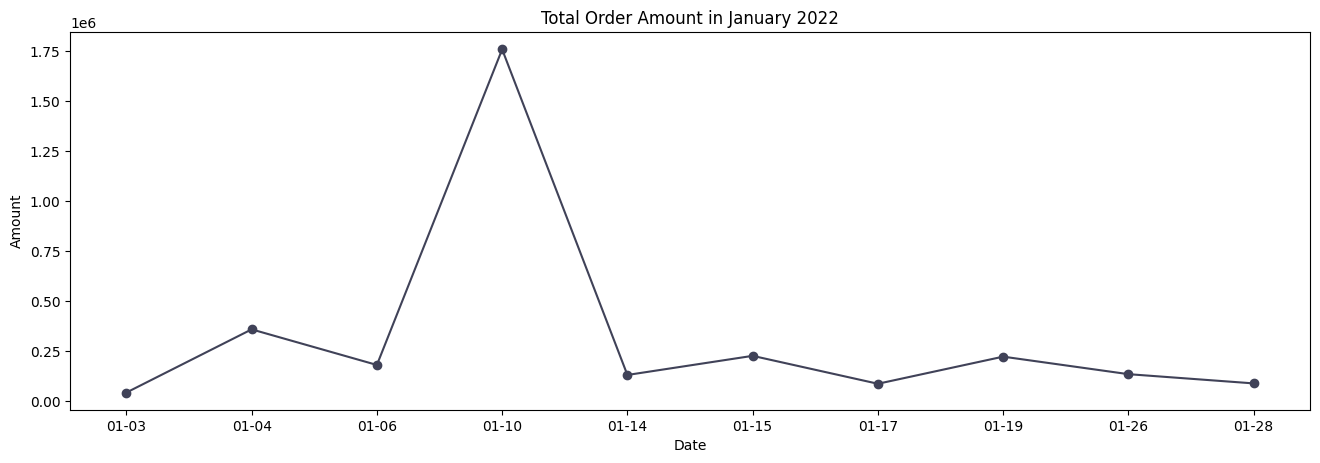

In [ ]:
plot_df(df_agg.query("(Month == '01' & Year=='2022')"), x = df_agg.query("(Month == '01' & Year=='2022')").Day, y=df_agg.query("(Month == '01' & Year=='2022')").amount, title ='Total Order Amount in January 2022', ylabel="Amount")

>Based on the chart above, it can be seen that in January 2022 the trend of total customer purchases increased, although in January there was a significant decrease on January 14, 2022 which reached a low point of 132000, and reached an all-time peak/high. January 10, 2022 which reached 1760000. From the chart we can also see that there were **only 10 transaction days** that occurred where in the **first week there was 3 transaction days** sale, in the **second week there were 2 transaction days**, in the **third week there were 3 sales**, and there were **in the fourth week** there was **2 transaction days**. 
it decreased from the previous month. The amount of customer consumption decreased resulting in the amount of sales also decreased

In [ ]:
df[(df['Month'] == '02') & (df['Year'] == '2022')].groupby(['Day']).agg({'amount': 'sum'})

,amount
Day,
02-03,272000
02-07,312000
02-09,92000
02-10,264000
02-12,488000
02-19,44000
02-22,182000
02-25,48000


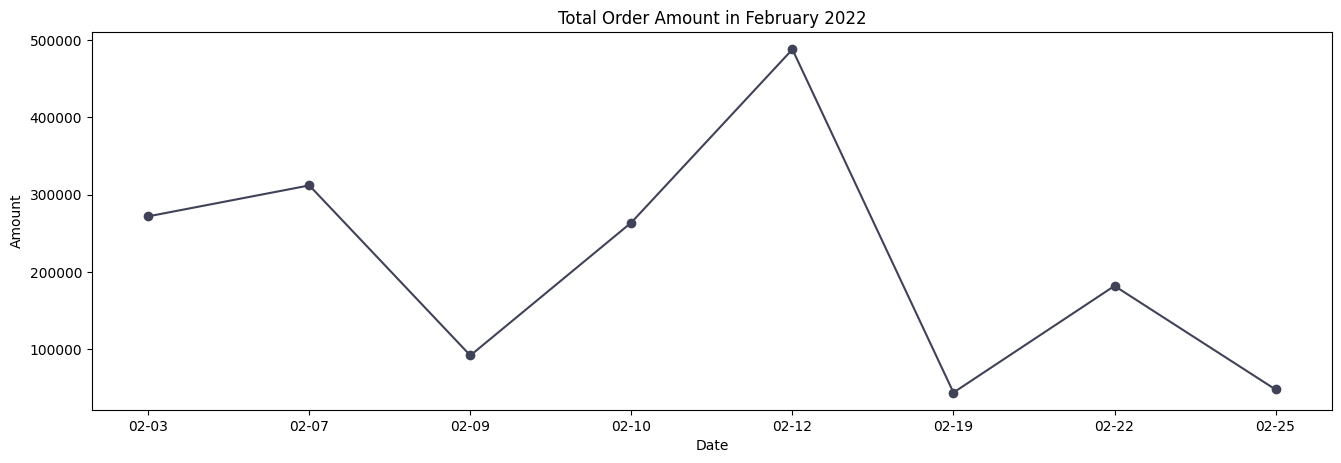

In [ ]:
plot_df(df_agg.query("(Month == '02' & Year=='2022')"), x = df_agg.query("(Month == '02' & Year=='2022')").Day, y=df_agg.query("(Month == '02' & Year=='2022')").amount, title ='Total Order Amount in February 2022', ylabel="Amount")

>Based on the chart above, it can be seen that in February 2022 the trend of total customer purchases increased, although in February there was a significant decrease on 19 February 2022 which reached a low of 44000, and reached an all-time peak/high. February 12, 2022 which reached 488000. From the chart we can also see that there were **only 8 transaction days** that occurred where in the **first week there was 2 transaction days** sale, in the **second week there were 3 transaction days**, in the **third week there were 2 transaction days**, and there were **in the fourth week** there was **only one transaction days**. 
it decreased from the previous month. The amount of customer consumption decreased resulting in the amount of sales also decreased

# Preprocessing Model

In [ ]:
NOW = dt.date.today()
df['Date'] = pd.DatetimeIndex(df['order date']).date

In [ ]:
# recency

df_recency = df.groupby(['customer id'], as_index = False)['Date'].max()
df_recency.columns = ['customer id', 'Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()

,customer id,Recency
0,10059817,390
1,1007924,424
2,10127635,420
3,10127944,420
4,10132134,420


In [ ]:
FM_Table = df.groupby('customer id').agg({'order no'   : lambda x:len(x), 
                                        'amount'      : lambda x:x.sum()})
FM_Table.rename(columns = {'order no' : 'Frequency',
                          'amount' : 'Monetary'}, inplace = True)

FM_Table.head()

,Frequency,Monetary
customer id,,
10059817,3,228000
1007924,2,92000
10127635,1,48000
10127944,1,44000
10132134,1,88000


In [ ]:
RFM_Table = df_recency.merge(FM_Table, left_on = 'customer id', right_on = 'customer id')
RFM_Table.head()

,customer id,Recency,Frequency,Monetary
0,10059817,390,3,228000
1,1007924,424,2,92000
2,10127635,420,1,48000
3,10127944,420,1,44000
4,10132134,420,1,88000


# RFM Modelling


In [ ]:
quantiles = RFM_Table.quantile(q=[0.25, 0.50, 0.75])
quantiles = quantiles.to_dict()

In [ ]:
segmented_rfm = RFM_Table.copy()

In [ ]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args= ('Recency', quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args= ('Frequency', quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args= ('Monetary', quantiles))
segmented_rfm.head()

,customer id,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,10059817,390,3,228000,1,1,1
1,1007924,424,2,92000,2,2,2
2,10127635,420,1,48000,2,4,3
3,10127944,420,1,44000,2,4,4
4,10132134,420,1,88000,2,4,2


In [ ]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)

In [ ]:
segmented_rfm.head()

,customer id,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,10059817,390,3,228000,1,1,1,111
1,1007924,424,2,92000,2,2,2,222
2,10127635,420,1,48000,2,4,3,243
3,10127944,420,1,44000,2,4,4,244
4,10132134,420,1,88000,2,4,2,242


In [ ]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

In [ ]:
segmented_rfm.head()

,customer id,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,10059817,390,3,228000,1,1,1,111,3
1,1007924,424,2,92000,2,2,2,222,6
2,10127635,420,1,48000,2,4,3,243,9
3,10127944,420,1,44000,2,4,4,244,10
4,10132134,420,1,88000,2,4,2,242,8


## boxplot RFM

Recency's outliers: set()
Frequency's outliers: {4, 5, 6, 7, 8, 9, 10, 12, 15, 28}
Monetary's outliers: {176000, 480000, 1760000, 1776000, 336000, 272000, 192000, 448000, 576000, 266000, 762000, 228000, 452000, 308000, 276000, 532000, 180000, 542000, 311600, 222000, 264000, 184000, 2200000, 440000, 536000, 226000, 178000, 273500, 444000, 220000, 572000, 540000, 188000, 230000, 182000, 534000, 540400}


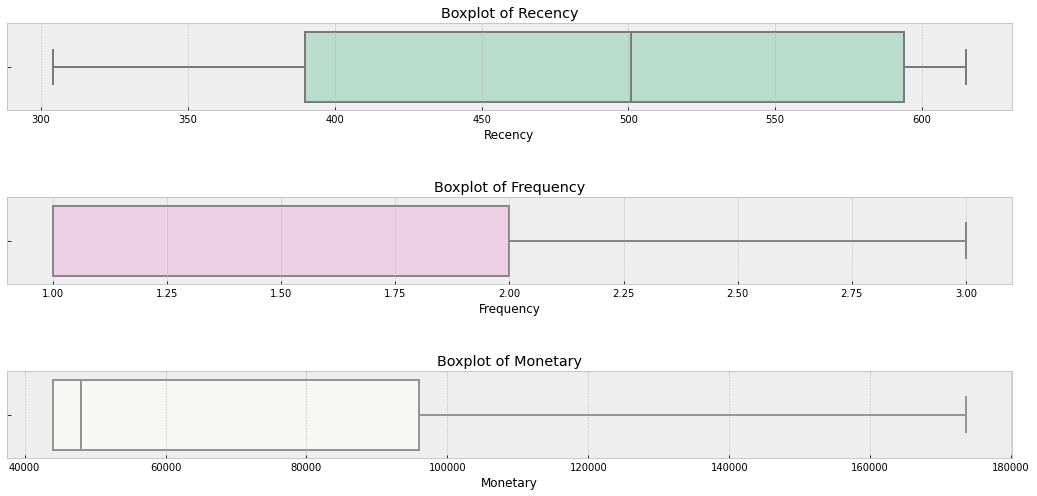

In [ ]:
plt.figure(1, figsize=(18,8))

n = 0
c = 0

pal = ['Pastel2', 'Pastel2_r', 'PiYG']

for x in ['Recency', 'Frequency', 'Monetary']:
    plt.style.use('bmh')
    n += 1
    plt.subplot(3, 1, n)
    plt.subplots_adjust(hspace = 1)
    sns.boxplot(segmented_rfm[x], palette=pal[c], showfliers = False)
    c+=1
    plt.title(f"Boxplot of {x}")
    a = set(boxplot_stats(segmented_rfm[x]).pop(0)['fliers'])
    print(f"{x}'s outliers: {a}")

The BoxPlot Recency data shows that there is a greater tendency towards larger values (ranging from 282 to 572), indicating a slight gap at lower values. This suggests that there may be an opportunity to improve performance by focusing on the smaller value range.

The Frequency boxplot data reveals that a significant number of data points are concentrated in the smaller range (from 1 to 2), with gaps in the higher values. This suggests that there may be an opportunity to increase performance by addressing the gaps in the larger value range.

The Monetary boxplot data indicates that a large number of data points are clustered in the lower range (between 44000 and 96000), with gaps in the higher values. This suggests that there may be potential to improve performance by filling in the gaps in the larger value range.

In [ ]:
segmented_rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,281.0,479.548043,98.332737,304.0,390.0,501.0,594.0,615.0
Frequency,281.0,2.067616,2.482593,1.0,1.0,1.0,2.0,28.0
Monetary,281.0,129461.565836,222238.560246,44000.0,44000.0,48000.0,96000.0,2200000.0
R_quartile,281.0,2.313167,0.986410,1.0,1.0,2.0,3.0,4.0
F_quartile,281.0,3.042705,1.269825,1.0,2.0,4.0,4.0,4.0
M_quartile,281.0,2.729537,1.235552,1.0,2.0,3.0,4.0,4.0
RFM_Score,281.0,8.085409,2.948335,3.0,5.0,9.0,11.0,12.0


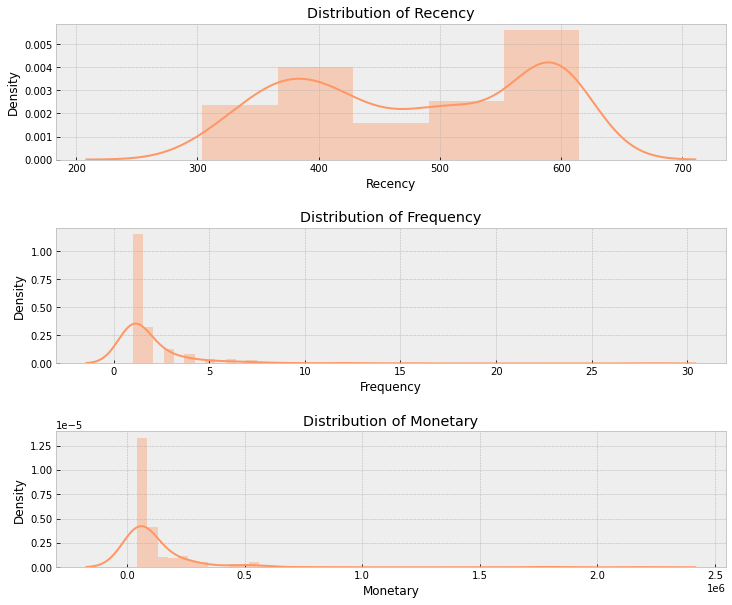

In [ ]:
plt.figure(1, figsize=(12,10))

n = 0

for x in ['Recency', 'Frequency', 'Monetary']:
    plt.style.use('bmh')
    n += 1
    plt.subplot(3, 1, n)
    plt.subplots_adjust(hspace = .5, wspace = .3)
    sns.distplot(segmented_rfm[x], color='#FF9765')
    plt.title(f"Distribution of {x}")

# Label

In [ ]:
label = [0] * len(segmented_rfm)

for i in range(0,len(segmented_rfm)):

    if segmented_rfm['RFM_Segment'][i] == '111':
        label[i] = "Best Customers"
        
    elif segmented_rfm['RFM_Segment'][i] == '134' :
        label[i] = "Almost Lost"
        
    elif segmented_rfm['RFM_Segment'][i] == '344':
        label[i] = "Lost Customers"
    
    elif segmented_rfm['RFM_Segment'][i] == '444':
        label[i] = "Lost Cheap Customers"

    elif segmented_rfm['F_quartile'][i] == 1:
        label[i] = "Loyal Customers"  
    
    elif segmented_rfm['M_quartile'][i] == 1:
        label[i] = "Big Spenders"   
        
    else:
        label[i] = "Others"

In [ ]:
segmented_rfm['Label'] = label

In [ ]:
segmented_rfm.head()

,customer id,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,Label
0,10059817,390,3,228000,1,1,1,111,3,Best Customers
1,1007924,424,2,92000,2,2,2,222,6,Others
2,10127635,420,1,48000,2,4,3,243,9,Others
3,10127944,420,1,44000,2,4,4,244,10,Others
4,10132134,420,1,88000,2,4,2,242,8,Others


-------------------

In [ ]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Best Customers:  29
Loyal Customers:  57
Big Spenders:  70
Almost Lost:  0
Lost Customers:  55
Lost Cheap Customers:  16


In [ ]:
total = (segmented_rfm['customer id'].count().item())
for i in list(segmented_rfm['Label'].unique()):
  a = 0
  b = segmented_rfm[segmented_rfm['Label'] == i].count()['Label'].astype(np.float32).item()
  a = (b)/total * 100
  print(f"{i}: {b}, Percentage of '{i}' is {a:.2f}% from all customers")

Best Customers: 29.0, Percentage of 'Best Customers' is 10.32% from all customers
Others: 140.0, Percentage of 'Others' is 49.82% from all customers
Loyal Customers: 28.0, Percentage of 'Loyal Customers' is 9.96% from all customers
Big Spenders: 13.0, Percentage of 'Big Spenders' is 4.63% from all customers
Lost Cheap Customers: 16.0, Percentage of 'Lost Cheap Customers' is 5.69% from all customers
Lost Customers: 55.0, Percentage of 'Lost Customers' is 19.57% from all customers


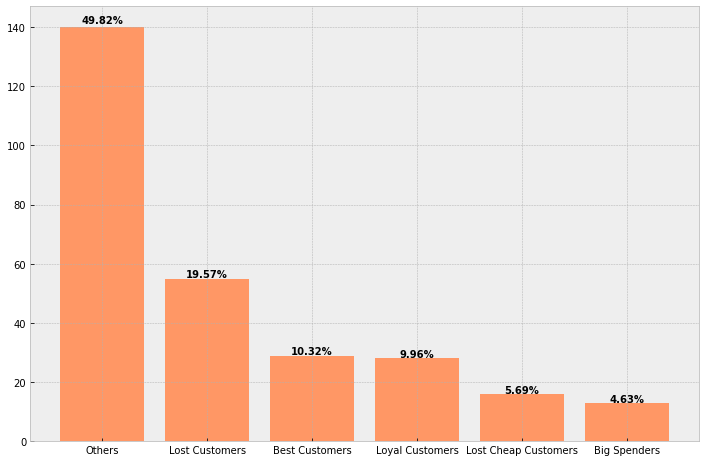

In [ ]:
sq1 = segmented_rfm.groupby('Label')['customer id'].nunique().sort_values(ascending=False).reset_index()

myArr = []
for i in list(list(sq1['Label'])):
    j = sq1[sq1["Label"] == i]['customer id'].iat[0]
    j = j/total * 100
    myArr.append(round(j, 2))
sq1['percentage'] = myArr

plt.figure(figsize= (12,8))
graph = plt.bar(sq1['Label'], sq1['customer id'], color='#FF9765')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(sq1.percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1

From the graph above, it is known that there are **6 customer categories**. The category with the highest number of customers is the Other Category and the least is Almost Loss Customer.
* **Other category** is a category that is **not listed** in other categories, the Other Category makes purchases with **small frequency** and **small total purchases** so it is not listed in other categories. this category has a fairly large percentage, namely **49.82%** of all customers.
* **Loyal customers** are customers who **frequently make purchases**. The percentage of loyal customers is **9.96%** of all customers.
* **Big Spenders** are customers who **make purchases in large quantities**, the percentage of Big Spenders customers is **4.63%** of all customers.
* **Lost Cheap Customers** are customers who **have been making purchases for a long time**, rarely make purchases and total purchases are **small price**, the number of customers in the Lost Inexpensive Customers category is **5.69%** of all customers.
* **best customer** is a customer who has just made a purchase, **often makes a purchase** and the total purchase is **the price is big**, the number of customers included in this category is **10.32%** of the total customer
* **Lost Customers**, are customers who **have not made a purchase in a long time**, rarely make purchases and have a small **total purchase** price, customers included in this category are **19.57%** from all customers.

# Result


*   **From the data above**, it can be seen that **at least 1 customer buys brownies and at most 20 pieces.** Of all the products, we know that the **cheapest price is 42,000** and the m**ost expensive is 48,000** with an **average product selling price of 44,929**. **There have never been additional companions sold for brownies**. **the smallest discount is 0** and **the biggest discount is 10 percent.** **The smallest amount of discount given is 0** and **the largest is 9600** with an **average discount given is 41.82**. Tax has not been given because VAT has not been applied. From here we know that **the smallest cost incurred for brownie products is 29306** and **the largest cost is 32600** and **the average cost for each brownie is 30933**. Of all the costs incurred from each sale, **the smallest cost in one transaction is 12694** and **the largest cost issued in one transaction is 586120** with an **average cost incurred in one transaction is 43094.79**. From **each sale** of brownies, **the smallest profit is 8395** and **the largest is 293880** with **the average profit from all sales being 19538.59**
*   In the graph above, Brownichoa Almonds are the most frequently purchased item by customers, namely a total purchase of 188 pieces with a percentage of 32.36% of the entire customer, followed by Brownichoa Chocochips, a total purchase of 134 pieces with 23.06% of the entire customer. 
* Brownie variants that customers rarely purchase are the Brownichoa Mix Almond Chocochip Variant, Mix Almond Cheese Variant, Mix 3 Variant and Original, with a total purchase of each only once.
* Based on the graph above, we know that the highest total customers are in the Central Java region, with 63.17% of the entire customers with a total of 367 customers, while the lowest total customers are in the Karawang region, with  1% of the total customers with one total customer.
* Based on the graph above, the customer often buys through Nicoa's official website, with 410 customers or 70.57% of the total customer. While the platforms that customers rarely use are online motorcycle taxis, namely grab and Gofood, namely a total of only two customers with a percentage of 0.34% of the total customer.
* Based on the chart above, it can be seen that in April 2021 the trend of total customer purchases increased, even though in April 2021 there was a significant decrease on April 29 2021 which reached a low point of 44000, and reached an all-time peak/high. April 27, 2021 which reached 2200000
* Based on the chart above, it can be seen that in May 2021 the trend of total customer purchases increased, although in May 2021 there was a significant decrease on May 21 2021 which reached a lowest point of 896000, and reached an all-time peak/high. May 11, 2021 which reached 2722000.
* Based on the chart above, it can be seen that in June 2021 the trend of total customer purchases increased, although in June 2021 there was a significant decrease on June 22 2021 which reached a low point of 140000, and reached an all-time peak/high. June 21, 2021 which reached 630000.
* Based on the graph above, it can be seen that in July 2021 the trend of total customer purchases increased, although in July 2021 there was a significant decrease on 16 July 2021 which reached a low of 220000, and reached an all-time peak/high. July 12, 2021 which reached 398000.
* Based on the chart above, it can be seen that in August 2021 the trend of total customer purchases increased, although in August 2021 there was a significant decrease on August 14 2021 which reached a low point of 88000, and reached an all-time peak/high. August 10, 2021 which reached 704000.
* Based on the chart above, September has a trend of small total purchases with the highest total purchases occurring on September 30 with a total of 312000, and the lowest purchases on September 17 with a total of 44000.
* Based on the chart above, it can be seen that in October 2021 the trend of total customer purchases increased, although in October 2021 there was a significant decrease on October 27, 2021 which reached a low point of 96000, and reached an all-time peak/high. October 21, 2021 which reached 456000.
* Based on the chart above, it can be seen that in November 2021 the trend of total customer purchases experienced a fairly stable increase and decrease, but on November 20, sales increased dramatically from 264,000 from November 15 to 1,918,000 on November 20, which was the highest peak of total sales in the month November 2021, then decreased to reach its lowest point on November 23 of 41,800.
* Based on the graph above, it can be seen that in December 2021 the trend of total customer purchases has increased a lot at the beginning and middle of the month, this can be assumed because that date is approaching the Christmas celebration. The highest purchases were on December 7, reaching 1450000, then December 17-20 total purchases were above 500000.
* Based on the chart above, it can be seen that in January 2022 the trend of total customer purchases increased, although in January there was a significant decrease on January 14, 2022 which reached a low point of 132000, and reached an all-time peak/high. January 10, 2022 which reached 1760000.
* Based on the chart above, it can be seen that in February 2022 the trend of total customer purchases increased, although in February there was a significant decrease on 19 February 2022 which reached a low of 44000, and reached an all-time peak/high. February 12, 2022 which reached 488000.
* From the graph above, it is known that there are **6 customer categories**. The category with the highest number of customers is the Other Category and the least is Almost Loss Customer. **Other category** is a category that is **not listed** in other categories, the Other Category makes purchases with **small frequency** and **small total purchases** so it is not listed in other categories. this category has a fairly large percentage, namely **49.82%** of all customers. **Loyal customers** are customers who **frequently make purchases**. The percentage of loyal customers is **9.96%** of all customers. **Big Spenders** are customers who **make purchases in large quantities**, the percentage of Big Spenders customers is **4.63%** of all customers. **Lost Cheap Customers** are customers who **have been making purchases for a long time**, rarely make purchases and total purchases are **small price**, the number of customers in the Lost Inexpensive Customers category is **5.69%** of all customers. **best customer** is a customer who has just made a purchase, **often makes a purchase** and the total purchase is **the price is big**, the number of customers included in this category is **10.32%** of the total customer. **Lost Customers**, are customers who **have not made a purchase in a long time**, rarely make purchases and have a small **total purchase** price, customers included in this category are **19.57%** from all customers.


# Recommendation



* Recommendation for "Loyal Customer" segment : To maintain and maximize the loyalty of this customer group, companies need to focus on developing and maintaining the quality of products that are often sold in this segment and provide more bonuses for every purchase.
* Recommendation for "Big Spender" Segment : In order to keep and boosting frequency of order, focus on give loyalty and advantages for every order 
* Recommendation for "Best Customers" segment: Focus on boosting client purchases; as a result, develop an upselling/cross-selling strategy or make bundling strategy such as chocolate packet with some of add-ons.
* Recommendation for "Lost Cheap Customer" Segment : For this segment, re-campaigns are needed by paying more attention to our products, reducing the overly complicated process of ordering, understanding customer desires, and making offers more often such as bundling packages of the same kind.
* Recommendation for "Lost Customer" Segment : 
To get customers back, we need to do trial and error which offers are suitable for them and create a repurchase strategy with more bonuses/benefits for them according to the results obtained during trial and error.
* Recommendation for others:
Nichoa can make a recipe with a new formula. The texture of the brownies is made more fluffy and softer, on the inside the brownies are made so they don't stick in the mouth.
For people with diabetes it's enough but for normal people it's not sweet enough.
Because nichoa is made from cassava flour, it makes the texture of the brownies denser, so nichoa can do trial and error so that cassava flour is like wheat flour.

In [ ]:
dfLabel = df.drop_duplicates(subset=['customer id'])
dfLabel

,order no,order date,order source,serve by,sales name,sales email,customer type,customer id,customer name,customer phone,item name,qty,basic_price,price,add-on price,discount percent,discount amount,amount,tax_amount,cost perunit,total cost,profit,Provinsi,shipping to,payment type,Year,Day,Month,Date
0,E39421042000000227,2021-04-20,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7519772,Feri Fitriana,'081329173047,Brownichoa Almond,1,44000,44000,0,0,0,44000,0,31605,31605,12395,Jateng,Banyumas,BNI Andri Setyowati,2021,04-20,04,2021-04-20
2,E39421042000000228,2021-04-20,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7519785,Amelia Ayu Via Dewanti,'081237479375,Brownichoa Almond,1,44000,44000,0,0,0,44000,0,31605,31605,12395,Jatim,Pacitan,BNI Andri Setyowati,2021,04-20,04,2021-04-20
3,E39421042000000229,2021-04-20,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7519797,Bu Is,'085747573100,Brownichoa Cheese,1,44000,44000,0,0,0,44000,0,30405,30405,13595,Jateng,Kab Mgl,CASH,2021,04-20,04,2021-04-20
4,E39421042000000230,2021-04-20,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7519802,Diah Setiani,'0895364805487,Brownichoa Mixed Nut,1,48000,48000,0,0,0,48000,0,31805,31805,16195,Jateng,Kab Mgl,CASH,2021,04-20,04,2021-04-20
5,7.15E+17,2021-04-23,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7549341,Ibu Nona,'081329167295,Brownichoa Almond,1,44000,44000,0,0,0,44000,0,31605,31605,12395,Jateng,Kab Mgl,CASH,2021,04-23,04,2021-04-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,E39422020700000520,2022-02-07,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,11666631,Susi Librawati,'085290832318,Brownichoa Cheese,1,44000,44000,0,0,0,44000,0,30705,30705,13295,Jateng,Kab Mgl,Mandiri CV Nutrico Nusantara,2022,02-07,02,2022-02-07
563,E39422020700000522,2022-02-07,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7071099,Fitri Rahmawati,'082135576257,Brownichoa Mixed Nut,1,48000,48000,0,0,0,48000,0,31805,31805,16195,Jateng,Kab Mgl,Mandiri CV Nutrico Nusantara,2022,02-07,02,2022-02-07
566,E39422021000000536,2022-02-10,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,11704127,Maria Sabina DC (by Nurul Fadillah),'085239334798,Brownichoa Cheese,3,44000,44000,0,0,0,132000,0,30705,92115,39885,Jabar,Bogor,Mandiri CV Nutrico Nusantara,2022,02-10,02,2022-02-10
575,E39422021900000575,2022-02-19,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,shopee,11829832,Novi triandana,'081315097000,Brownichoa Chocochips,1,44000,44000,0,0,0,44000,0,29306,29306,14694,DIY,DIY,Pembelian Via Shopee,2022,02-19,02,2022-02-19


In [ ]:
segmented_rfm

,customer id,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,Label
0,10059817,390,3,228000,1,1,1,111,3,Best Customers
1,1007924,424,2,92000,2,2,2,222,6,Others
2,10127635,420,1,48000,2,4,3,243,9,Others
3,10127944,420,1,44000,2,4,4,244,10,Others
4,10132134,420,1,88000,2,4,2,242,8,Others
...,...,...,...,...,...,...,...,...,...,...
276,9935761,434,1,44000,2,4,4,244,10,Others
277,9968728,420,2,88000,2,2,2,222,6,Others
278,9968855,431,1,44000,2,4,4,244,10,Others
279,9969473,431,1,44000,2,4,4,244,10,Others


In [ ]:
dfLabel = dfLabel.join(segmented_rfm.set_index('customer id')[['Label']], on = 'customer id')
dfLabel

,order no,order date,order source,serve by,sales name,sales email,customer type,customer id,customer name,customer phone,item name,qty,basic_price,price,add-on price,discount percent,discount amount,amount,tax_amount,cost perunit,total cost,profit,Provinsi,shipping to,payment type,Year,Day,Month,Date,Label
0,E39421042000000227,2021-04-20,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7519772,Feri Fitriana,'081329173047,Brownichoa Almond,1,44000,44000,0,0,0,44000,0,31605,31605,12395,Jateng,Banyumas,BNI Andri Setyowati,2021,04-20,04,2021-04-20,Others
2,E39421042000000228,2021-04-20,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7519785,Amelia Ayu Via Dewanti,'081237479375,Brownichoa Almond,1,44000,44000,0,0,0,44000,0,31605,31605,12395,Jatim,Pacitan,BNI Andri Setyowati,2021,04-20,04,2021-04-20,Lost Cheap Customers
3,E39421042000000229,2021-04-20,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7519797,Bu Is,'085747573100,Brownichoa Cheese,1,44000,44000,0,0,0,44000,0,30405,30405,13595,Jateng,Kab Mgl,CASH,2021,04-20,04,2021-04-20,Best Customers
4,E39421042000000230,2021-04-20,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7519802,Diah Setiani,'0895364805487,Brownichoa Mixed Nut,1,48000,48000,0,0,0,48000,0,31805,31805,16195,Jateng,Kab Mgl,CASH,2021,04-20,04,2021-04-20,Others
5,7.15E+17,2021-04-23,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7549341,Ibu Nona,'081329167295,Brownichoa Almond,1,44000,44000,0,0,0,44000,0,31605,31605,12395,Jateng,Kab Mgl,CASH,2021,04-23,04,2021-04-23,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,E39422020700000520,2022-02-07,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,11666631,Susi Librawati,'085290832318,Brownichoa Cheese,1,44000,44000,0,0,0,44000,0,30705,30705,13295,Jateng,Kab Mgl,Mandiri CV Nutrico Nusantara,2022,02-07,02,2022-02-07,Others
563,E39422020700000522,2022-02-07,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,7071099,Fitri Rahmawati,'082135576257,Brownichoa Mixed Nut,1,48000,48000,0,0,0,48000,0,31805,31805,16195,Jateng,Kab Mgl,Mandiri CV Nutrico Nusantara,2022,02-07,02,2022-02-07,Others
566,E39422021000000536,2022-02-10,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,Guest,11704127,Maria Sabina DC (by Nurul Fadillah),'085239334798,Brownichoa Cheese,3,44000,44000,0,0,0,132000,0,30705,92115,39885,Jabar,Bogor,Mandiri CV Nutrico Nusantara,2022,02-10,02,2022-02-10,Big Spenders
575,E39422021900000575,2022-02-19,POINT OF SALE,Ani Sudaryani,Ani Sudaryani,sudaryaniani1@gmail.com,shopee,11829832,Novi triandana,'081315097000,Brownichoa Chocochips,1,44000,44000,0,0,0,44000,0,29306,29306,14694,DIY,DIY,Pembelian Via Shopee,2022,02-19,02,2022-02-19,Others


In [ ]:
from google.colab import files

dfLabel.to_csv('dfLabel.csv')
files.download('dfLabel.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>